In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mlbdata = pd.read_csv('cleaned_mlb_data.csv')
kbodata = pd.read_csv('cleaned_kbo_data.csv')

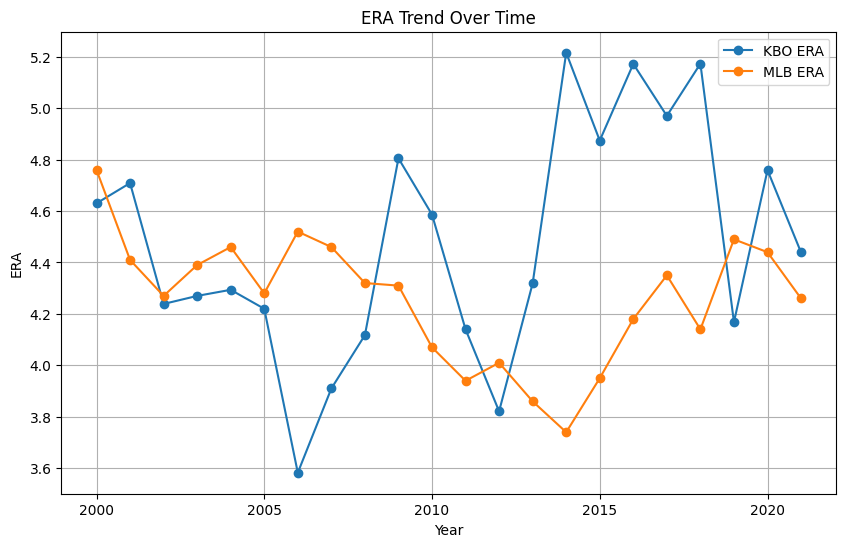

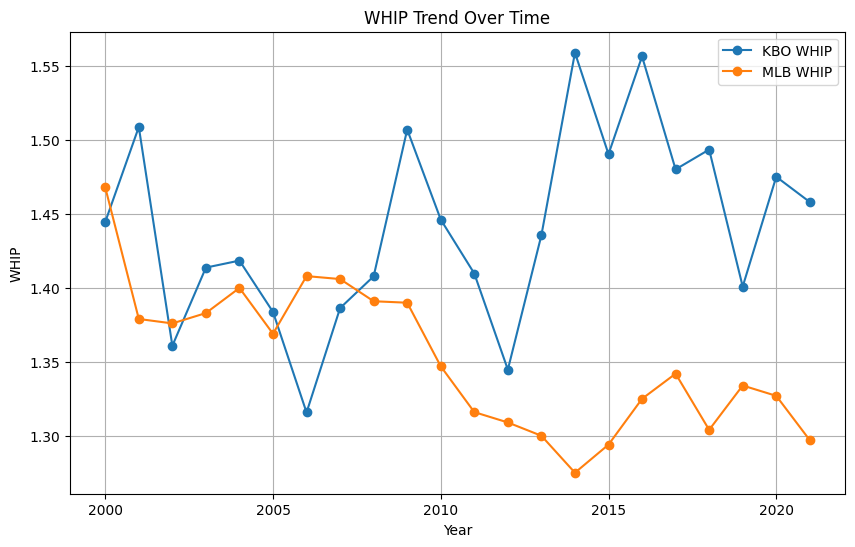

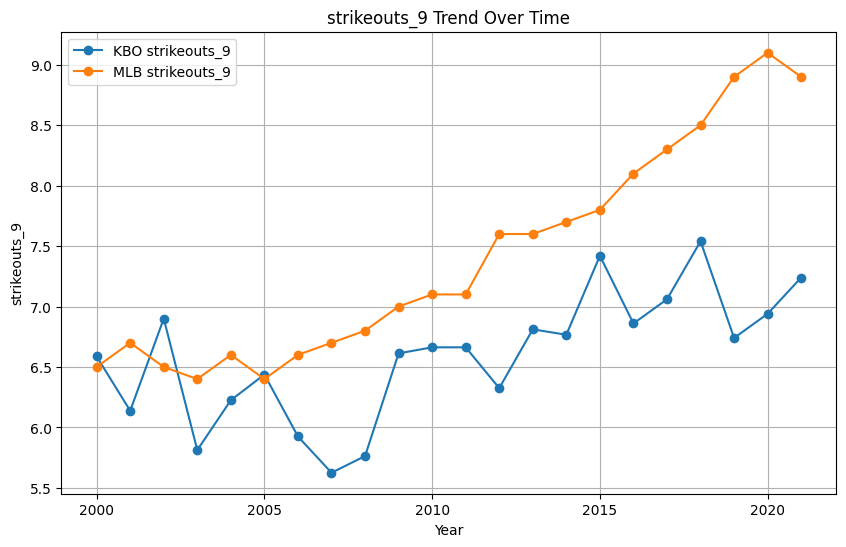

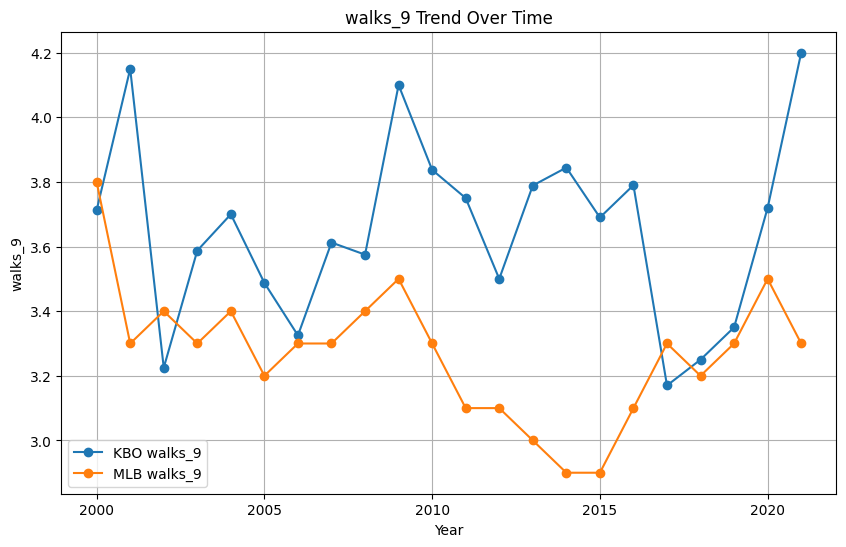

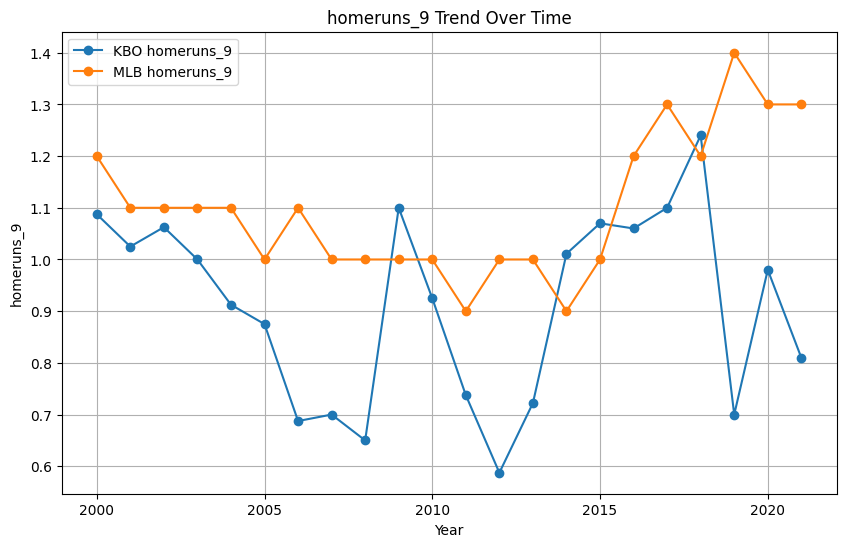

In [4]:
# Define a function to plot metrics for both leagues
def plot_metric_trends(metric):
    plt.figure(figsize=(10, 6))
    
    # Plot KBO data
    plt.plot(kbodata['year'], kbodata[metric], label=f'KBO {metric}', marker='o')
    
    # Plot MLB data
    plt.plot(mlbdata['year'], mlbdata[metric], label=f'MLB {metric}', marker='o')
    
    plt.title(f'{metric} Trend Over Time')
    plt.xlabel('Year')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting each metric
metrics = ['ERA', 'WHIP', 'strikeouts_9', 'walks_9', 'homeruns_9']
for metric in metrics:
    plot_metric_trends(metric)


In [5]:
# Compare overall trends by calculating mean and standard deviation for each metric
comparison_stats = pd.DataFrame({
    'Metric': metrics,
    'KBO Mean': [kbodata[metric].mean() for metric in metrics],
    'MLB Mean': [mlbdata[metric].mean() for metric in metrics],
    'KBO Std Dev': [kbodata[metric].std() for metric in metrics],
    'MLB Std Dev': [mlbdata[metric].std() for metric in metrics]
})

print("Comparison of Key Pitching Metrics Between KBO and MLB:")
print(comparison_stats)

Comparison of Key Pitching Metrics Between KBO and MLB:
         Metric  KBO Mean  MLB Mean  KBO Std Dev  MLB Std Dev
0           ERA  4.473327  4.255000     0.452771     0.247343
1          WHIP  1.440824  1.351818     0.064417     0.048602
2  strikeouts_9  6.593308  7.404545     0.522533     0.894681
3       walks_9  3.652992  3.268182     0.285862     0.205603
4    homeruns_9  0.911061  1.100000     0.183377     0.138013


In [6]:
# Calculate correlation between ERA and strikeouts_9, and ERA and walks_9 for both leagues
kbo_corr_strikeouts = kbodata['ERA'].corr(kbodata['strikeouts_9'])
kbo_corr_walks = kbodata['ERA'].corr(kbodata['walks_9'])

mlb_corr_strikeouts = mlbdata['ERA'].corr(mlbdata['strikeouts_9'])
mlb_corr_walks = mlbdata['ERA'].corr(mlbdata['walks_9'])

# Display the correlation results
print("Correlation between ERA and Strikeouts per 9 innings (KBO):", kbo_corr_strikeouts)
print("Correlation between ERA and Walks per 9 innings (KBO):", kbo_corr_walks)
print("\nCorrelation between ERA and Strikeouts per 9 innings (MLB):", mlb_corr_strikeouts)
print("Correlation between ERA and Walks per 9 innings (MLB):", mlb_corr_walks)

Correlation between ERA and Strikeouts per 9 innings (KBO): 0.649219456244086
Correlation between ERA and Walks per 9 innings (KBO): 0.2411621207872778

Correlation between ERA and Strikeouts per 9 innings (MLB): -0.21314108967338008
Correlation between ERA and Walks per 9 innings (MLB): 0.8535079654744163


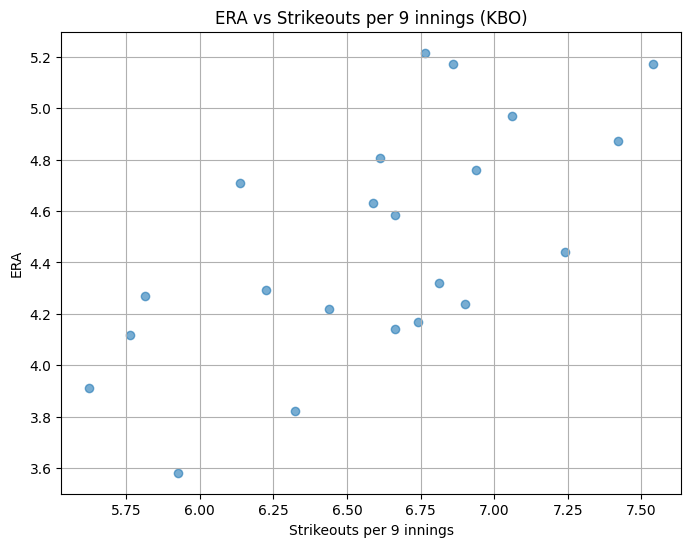

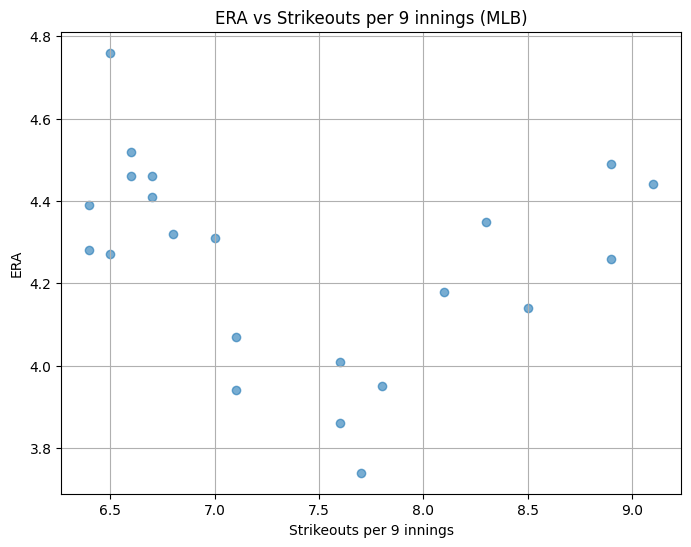

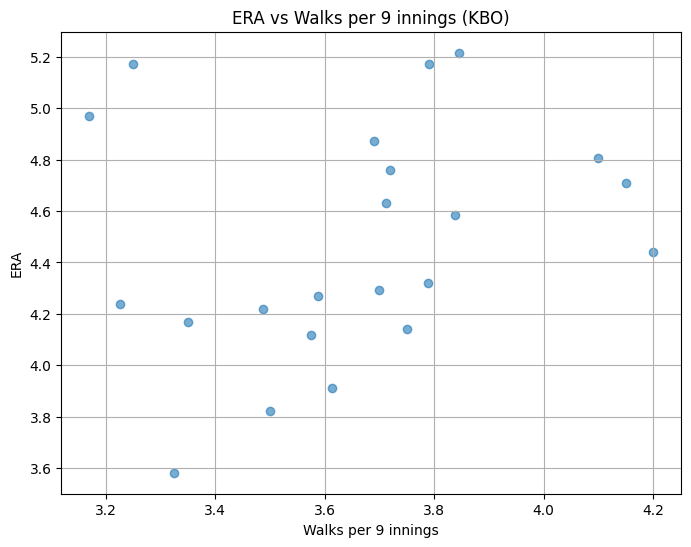

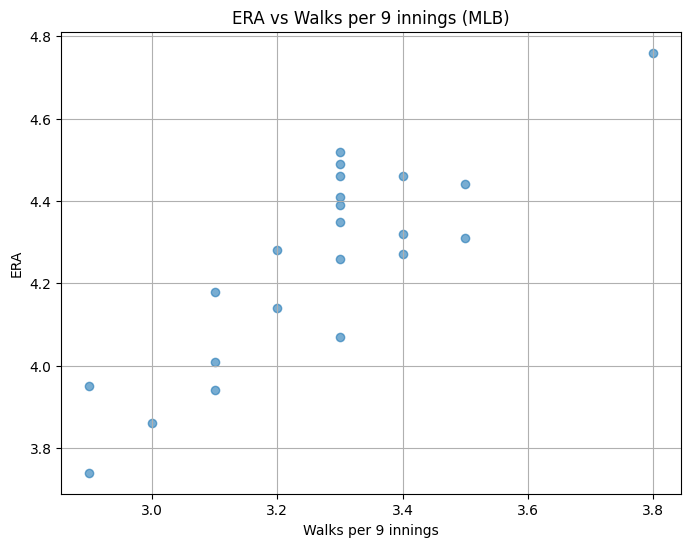

In [7]:
# Define a function to create scatter plots for both metrics
def plot_scatter(x, y, xlabel, ylabel, league):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.6)
    plt.title(f'{ylabel} vs {xlabel} ({league})')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Plot ERA vs Strikeouts per 9 innings
plot_scatter(kbodata['strikeouts_9'], kbodata['ERA'], 'Strikeouts per 9 innings', 'ERA', 'KBO')
plot_scatter(mlbdata['strikeouts_9'], mlbdata['ERA'], 'Strikeouts per 9 innings', 'ERA', 'MLB')

# Plot ERA vs Walks per 9 innings
plot_scatter(kbodata['walks_9'], kbodata['ERA'], 'Walks per 9 innings', 'ERA', 'KBO')
plot_scatter(mlbdata['walks_9'], mlbdata['ERA'], 'Walks per 9 innings', 'ERA', 'MLB')

In [8]:
# Compare the correlation results to determine which metric has a stronger relationship with ERA
if abs(kbo_corr_strikeouts) > abs(kbo_corr_walks):
    print("In KBO, strikeout control (strikeouts_9) has a stronger relationship with ERA.")
else:
    print("In KBO, walk control (walks_9) has a stronger relationship with ERA.")

if abs(mlb_corr_strikeouts) > abs(mlb_corr_walks):
    print("In MLB, strikeout control (strikeouts_9) has a stronger relationship with ERA.")
else:
    print("In MLB, walk control (walks_9) has a stronger relationship with ERA.")

In KBO, strikeout control (strikeouts_9) has a stronger relationship with ERA.
In MLB, walk control (walks_9) has a stronger relationship with ERA.


In [9]:
# Calculate correlation between homeruns_9 and ERA, and homeruns_9 and WHIP for both leagues
kbo_corr_homeruns_era = kbodata['homeruns_9'].corr(kbodata['ERA'])
kbo_corr_homeruns_whip = kbodata['homeruns_9'].corr(kbodata['WHIP'])

mlb_corr_homeruns_era = mlbdata['homeruns_9'].corr(mlbdata['ERA'])
mlb_corr_homeruns_whip = mlbdata['homeruns_9'].corr(mlbdata['WHIP'])

# Display the correlation results
print("Correlation between Home Runs per 9 innings (homeruns_9) and ERA (KBO):", kbo_corr_homeruns_era)
print("Correlation between Home Runs per 9 innings (homeruns_9) and WHIP (KBO):", kbo_corr_homeruns_whip)
print("\nCorrelation between Home Runs per 9 innings (homeruns_9) and ERA (MLB):", mlb_corr_homeruns_era)
print("Correlation between Home Runs per 9 innings (homeruns_9) and WHIP (MLB):", mlb_corr_homeruns_whip)

Correlation between Home Runs per 9 innings (homeruns_9) and ERA (KBO): 0.8238891082455777
Correlation between Home Runs per 9 innings (homeruns_9) and WHIP (KBO): 0.664620849121502

Correlation between Home Runs per 9 innings (homeruns_9) and ERA (MLB): 0.5621675035114366
Correlation between Home Runs per 9 innings (homeruns_9) and WHIP (MLB): 0.030526326083575726


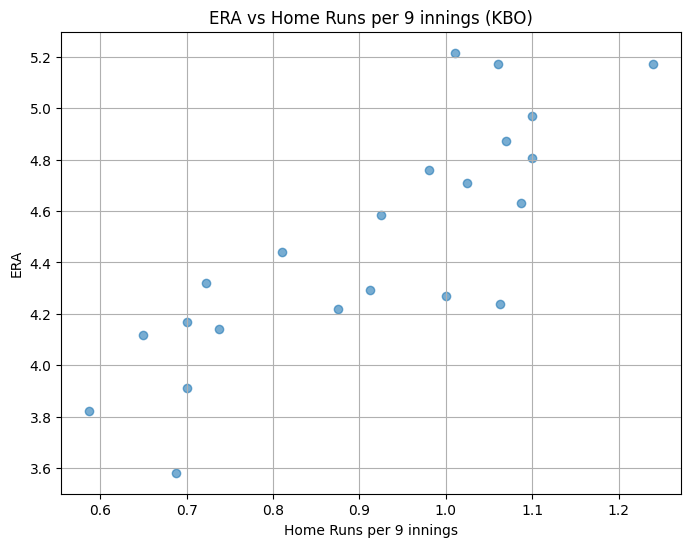

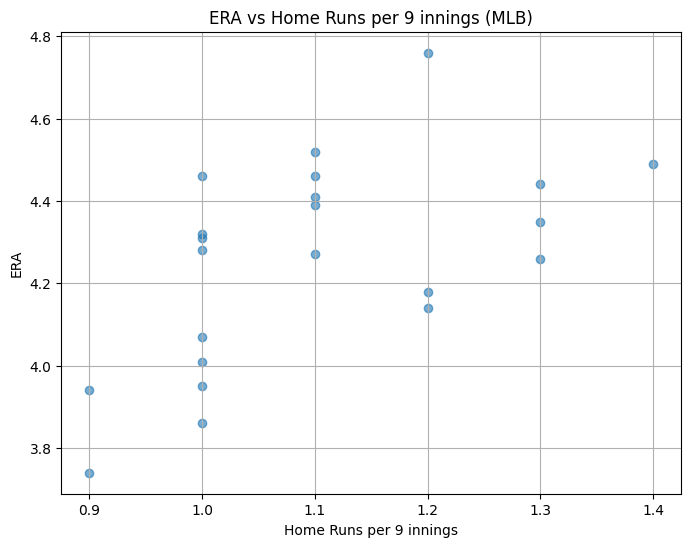

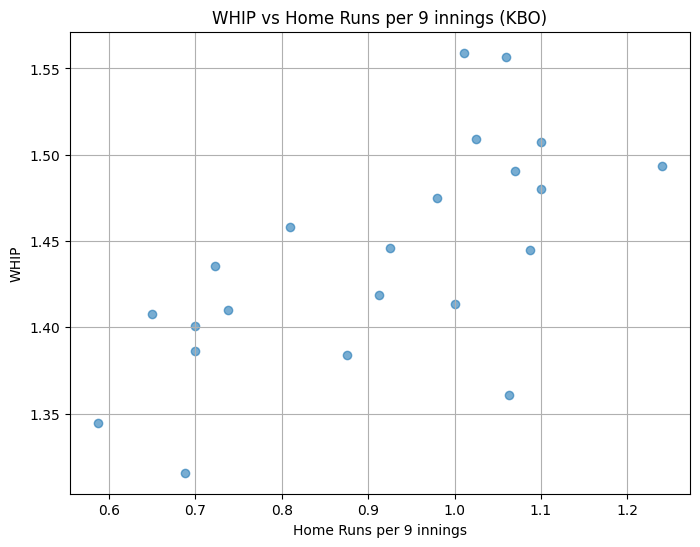

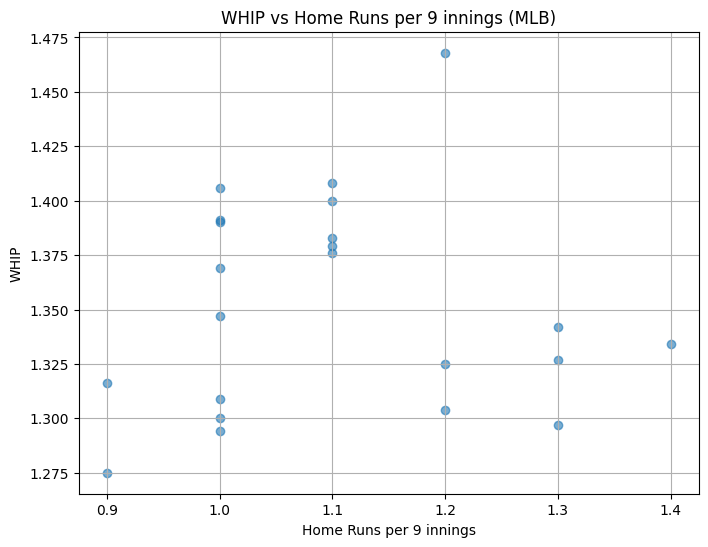

In [10]:
# Define a function to create scatter plots for both metrics
def plot_scatter_home_runs(x, y, xlabel, ylabel, league):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.6)
    plt.title(f'{ylabel} vs {xlabel} ({league})')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Plot ERA vs Home Runs per 9 innings
plot_scatter_home_runs(kbodata['homeruns_9'], kbodata['ERA'], 'Home Runs per 9 innings', 'ERA', 'KBO')
plot_scatter_home_runs(mlbdata['homeruns_9'], mlbdata['ERA'], 'Home Runs per 9 innings', 'ERA', 'MLB')

# Plot WHIP vs Home Runs per 9 innings
plot_scatter_home_runs(kbodata['homeruns_9'], kbodata['WHIP'], 'Home Runs per 9 innings', 'WHIP', 'KBO')
plot_scatter_home_runs(mlbdata['homeruns_9'], mlbdata['WHIP'], 'Home Runs per 9 innings', 'WHIP', 'MLB')

In [11]:
# Calculate correlation between average_age and key metrics for both leagues
kbo_corr_age_era = kbodata['average_age'].corr(kbodata['ERA'])
kbo_corr_age_whip = kbodata['average_age'].corr(kbodata['WHIP'])
kbo_corr_age_strikeouts = kbodata['average_age'].corr(kbodata['strikeouts_9'])
kbo_corr_age_walks = kbodata['average_age'].corr(kbodata['walks_9'])

mlb_corr_age_era = mlbdata['average_age'].corr(mlbdata['ERA'])
mlb_corr_age_whip = mlbdata['average_age'].corr(mlbdata['WHIP'])
mlb_corr_age_strikeouts = mlbdata['average_age'].corr(mlbdata['strikeouts_9'])
mlb_corr_age_walks = mlbdata['average_age'].corr(mlbdata['walks_9'])

# Display the correlation results
print("Correlation between Average Age and ERA (KBO):", kbo_corr_age_era)
print("Correlation between Average Age and WHIP (KBO):", kbo_corr_age_whip)
print("Correlation between Average Age and Strikeouts per 9 innings (KBO):", kbo_corr_age_strikeouts)
print("Correlation between Average Age and Walks per 9 innings (KBO):", kbo_corr_age_walks)
print("\nCorrelation between Average Age and ERA (MLB):", mlb_corr_age_era)
print("Correlation between Average Age and WHIP (MLB):", mlb_corr_age_whip)
print("Correlation between Average Age and Strikeouts per 9 innings (MLB):", mlb_corr_age_strikeouts)
print("Correlation between Average Age and Walks per 9 innings (MLB):", mlb_corr_age_walks)

Correlation between Average Age and ERA (KBO): 0.37545602541463713
Correlation between Average Age and WHIP (KBO): 0.36007161268691157
Correlation between Average Age and Strikeouts per 9 innings (KBO): 0.42929258129362236
Correlation between Average Age and Walks per 9 innings (KBO): -0.1714833663327964

Correlation between Average Age and ERA (MLB): 0.473053971866983
Correlation between Average Age and WHIP (MLB): 0.5885490211144572
Correlation between Average Age and Strikeouts per 9 innings (MLB): -0.612317962913767
Correlation between Average Age and Walks per 9 innings (MLB): 0.3284652585422765


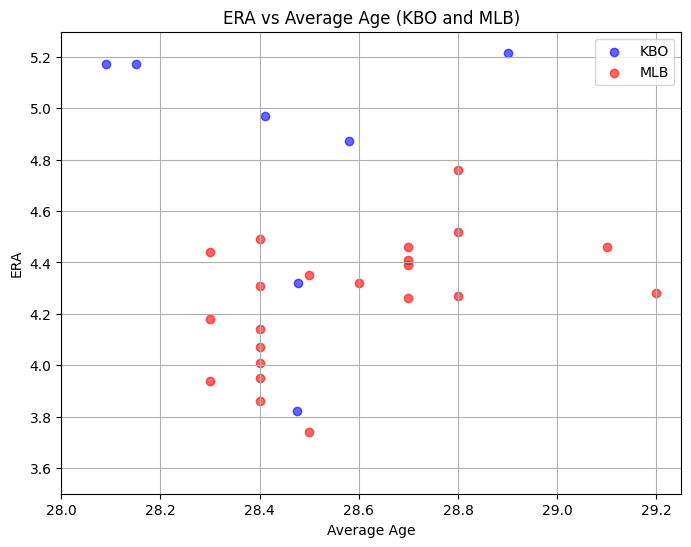

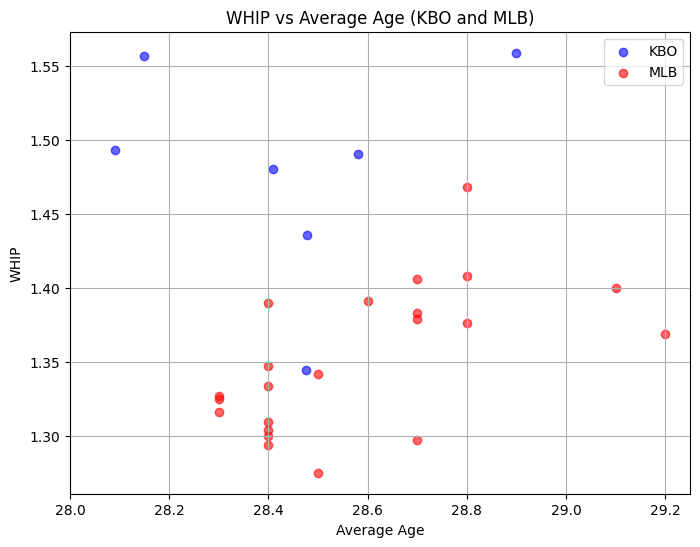

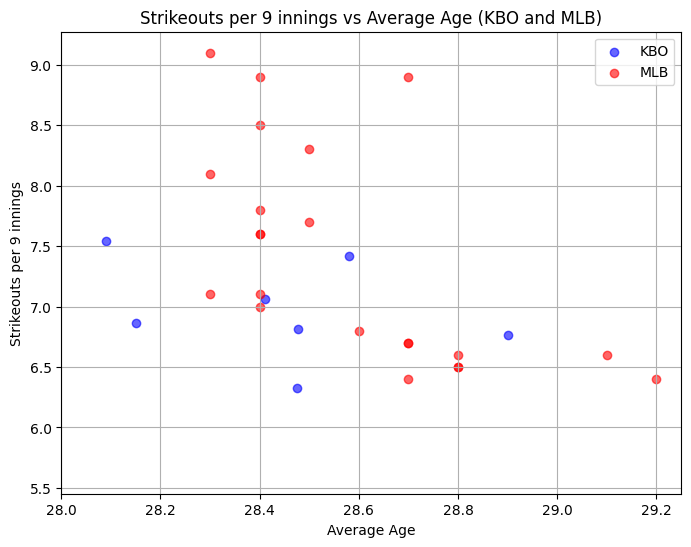

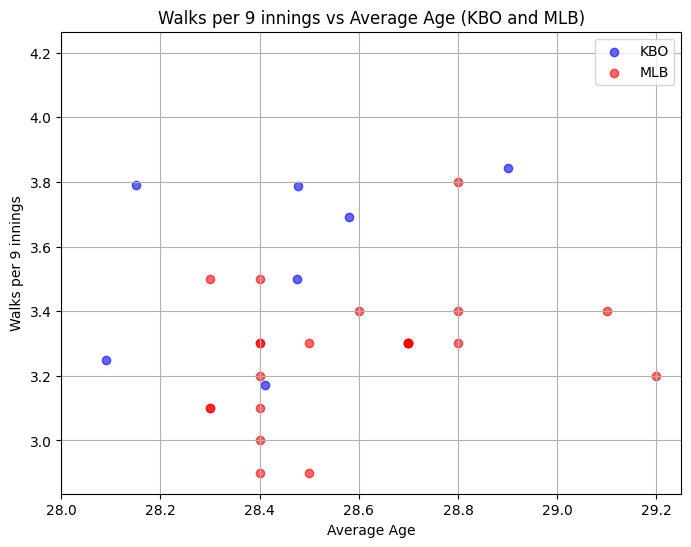

In [25]:
# Define a function to create scatter plots for average age against key metrics for both leagues
def plot_scatter_combined(x_kbo, y_kbo, x_mlb, y_mlb, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_kbo, y_kbo, alpha=0.6, label='KBO', color='blue')
    plt.scatter(x_mlb, y_mlb, alpha=0.6, label='MLB', color='red')
    plt.title(f'{ylabel} vs {xlabel} (KBO and MLB)')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(28, 29.25)
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot Average Age vs ERA for both leagues
plot_scatter_combined(kbodata['average_age'], kbodata['ERA'], mlbdata['average_age'], mlbdata['ERA'], 'Average Age', 'ERA')

# Plot Average Age vs WHIP for both leagues
plot_scatter_combined(kbodata['average_age'], kbodata['WHIP'], mlbdata['average_age'], mlbdata['WHIP'], 'Average Age', 'WHIP')

# Plot Average Age vs Strikeouts per 9 innings for both leagues
plot_scatter_combined(kbodata['average_age'], kbodata['strikeouts_9'], mlbdata['average_age'], mlbdata['strikeouts_9'], 'Average Age', 'Strikeouts per 9 innings')

# Plot Average Age vs Walks per 9 innings for both leagues
plot_scatter_combined(kbodata['average_age'], kbodata['walks_9'], mlbdata['average_age'], mlbdata['walks_9'], 'Average Age', 'Walks per 9 innings')

In [13]:
# Compare the correlation results to determine the impact of average age on performance
if abs(kbo_corr_age_era) > abs(mlb_corr_age_era):
    print("Average age has a stronger impact on ERA in KBO than in MLB.")
else:
    print("Average age has a stronger impact on ERA in MLB than in KBO.")

if abs(kbo_corr_age_whip) > abs(mlb_corr_age_whip):
    print("Average age has a stronger impact on WHIP in KBO than in MLB.")
else:
    print("Average age has a stronger impact on WHIP in MLB than in KBO.")

if abs(kbo_corr_age_strikeouts) > abs(mlb_corr_age_strikeouts):
    print("Average age has a stronger impact on strikeouts per 9 innings in KBO than in MLB.")
else:
    print("Average age has a stronger impact on strikeouts per 9 innings in MLB than in KBO.")

if abs(kbo_corr_age_walks) > abs(mlb_corr_age_walks):
    print("Average age has a stronger impact on walks per 9 innings in KBO than in MLB.")
else:
    print("Average age has a stronger impact on walks per 9 innings in MLB than in KBO.")

Average age has a stronger impact on ERA in MLB than in KBO.
Average age has a stronger impact on WHIP in MLB than in KBO.
Average age has a stronger impact on strikeouts per 9 innings in MLB than in KBO.
Average age has a stronger impact on walks per 9 innings in MLB than in KBO.


In [14]:
# Calculate correlation between workload metrics and performance metrics for both leagues
kbo_corr_innings_era = kbodata['innings_pitched'].corr(kbodata['ERA'])
kbo_corr_innings_whip = kbodata['innings_pitched'].corr(kbodata['WHIP'])
kbo_corr_complete_era = kbodata['complete_game'].corr(kbodata['ERA'])
kbo_corr_complete_whip = kbodata['complete_game'].corr(kbodata['WHIP'])
kbo_corr_finished_era = kbodata['games_finished'].corr(kbodata['ERA'])
kbo_corr_finished_whip = kbodata['games_finished'].corr(kbodata['WHIP'])
kbo_corr_saves_era = kbodata['saves'].corr(kbodata['ERA'])
kbo_corr_saves_whip = kbodata['saves'].corr(kbodata['WHIP'])

mlb_corr_innings_era = mlbdata['innings_pitched'].corr(mlbdata['ERA'])
mlb_corr_innings_whip = mlbdata['innings_pitched'].corr(mlbdata['WHIP'])
mlb_corr_complete_era = mlbdata['complete_game'].corr(mlbdata['ERA'])
mlb_corr_complete_whip = mlbdata['complete_game'].corr(mlbdata['WHIP'])
mlb_corr_finished_era = mlbdata['games_finished'].corr(mlbdata['ERA'])
mlb_corr_finished_whip = mlbdata['games_finished'].corr(mlbdata['WHIP'])
mlb_corr_saves_era = mlbdata['saves'].corr(mlbdata['ERA'])
mlb_corr_saves_whip = mlbdata['saves'].corr(mlbdata['WHIP'])

# Display the correlation results
print("Correlation between Innings Pitched and ERA (KBO):", kbo_corr_innings_era)
print("Correlation between Innings Pitched and WHIP (KBO):", kbo_corr_innings_whip)
print("Correlation between Complete Games and ERA (KBO):", kbo_corr_complete_era)
print("Correlation between Complete Games and WHIP (KBO):", kbo_corr_complete_whip)
print("Correlation between Games Finished and ERA (KBO):", kbo_corr_finished_era)
print("Correlation between Games Finished and WHIP (KBO):", kbo_corr_finished_whip)
print("Correlation between Saves and ERA (KBO):", kbo_corr_saves_era)
print("Correlation between Saves and WHIP (KBO):", kbo_corr_saves_whip)
print("\nCorrelation between Innings Pitched and ERA (MLB):", mlb_corr_innings_era)
print("Correlation between Innings Pitched and WHIP (MLB):", mlb_corr_innings_whip)
print("Correlation between Complete Games and ERA (MLB):", mlb_corr_complete_era)
print("Correlation between Complete Games and WHIP (MLB):", mlb_corr_complete_whip)
print("Correlation between Games Finished and ERA (MLB):", mlb_corr_finished_era)
print("Correlation between Games Finished and WHIP (MLB):", mlb_corr_finished_whip)
print("Correlation between Saves and ERA (MLB):", mlb_corr_saves_era)
print("Correlation between Saves and WHIP (MLB):", mlb_corr_saves_whip)

Correlation between Innings Pitched and ERA (KBO): 0.5708627798056768
Correlation between Innings Pitched and WHIP (KBO): 0.5015950984135101
Correlation between Complete Games and ERA (KBO): -0.2941171730337865
Correlation between Complete Games and WHIP (KBO): -0.349090589938539
Correlation between Games Finished and ERA (KBO): 0.2971466854620267
Correlation between Games Finished and WHIP (KBO): 0.30167351691151506
Correlation between Saves and ERA (KBO): 0.1405108644199582
Correlation between Saves and WHIP (KBO): 0.12265053052338397

Correlation between Innings Pitched and ERA (MLB): -0.18009686872061095
Correlation between Innings Pitched and WHIP (MLB): 0.10889785800863534
Correlation between Complete Games and ERA (MLB): 0.15027004558357224
Correlation between Complete Games and WHIP (MLB): 0.6004675078138259
Correlation between Games Finished and ERA (MLB): -0.18751715077129294
Correlation between Games Finished and WHIP (MLB): 0.05956682872855367
Correlation between Saves and 

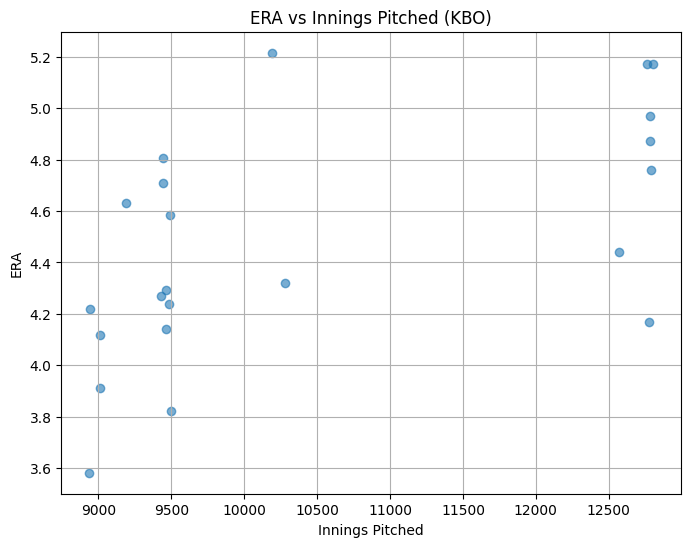

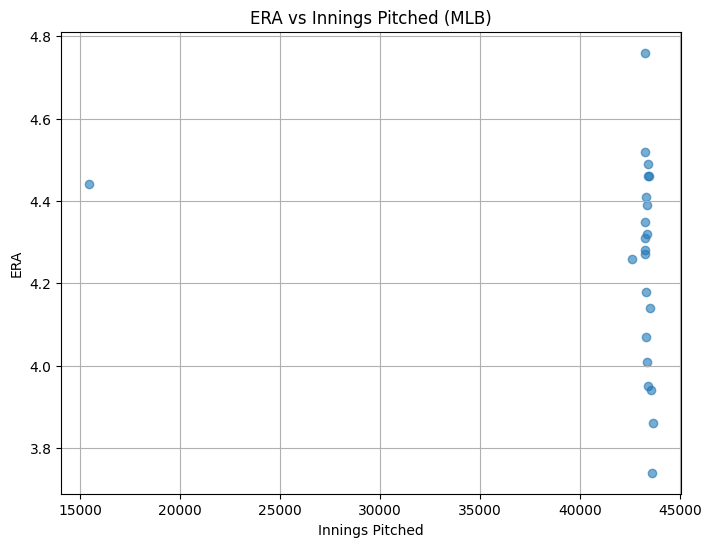

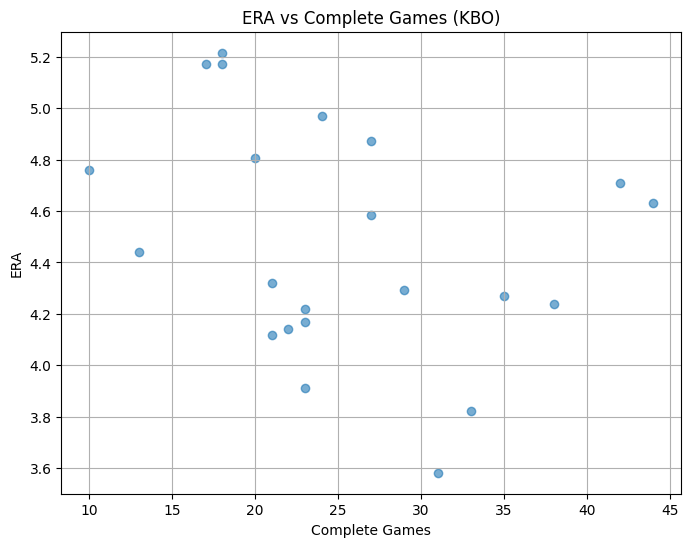

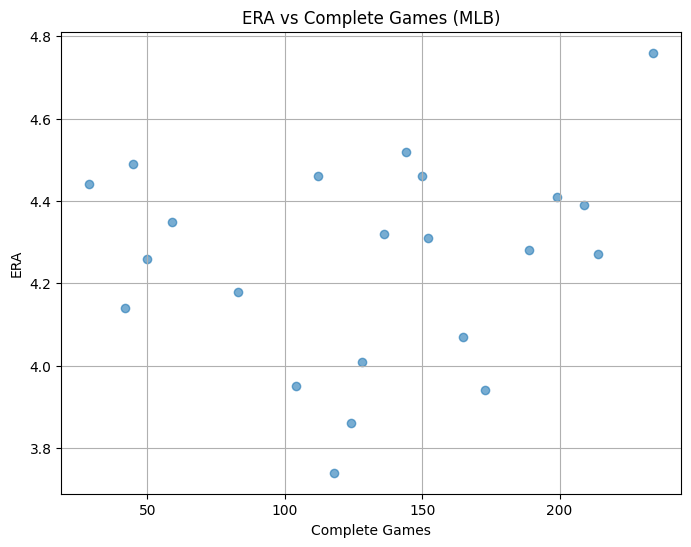

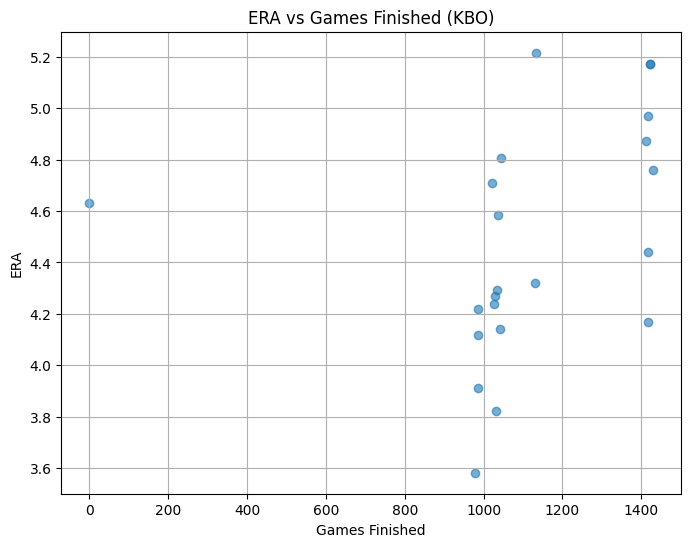

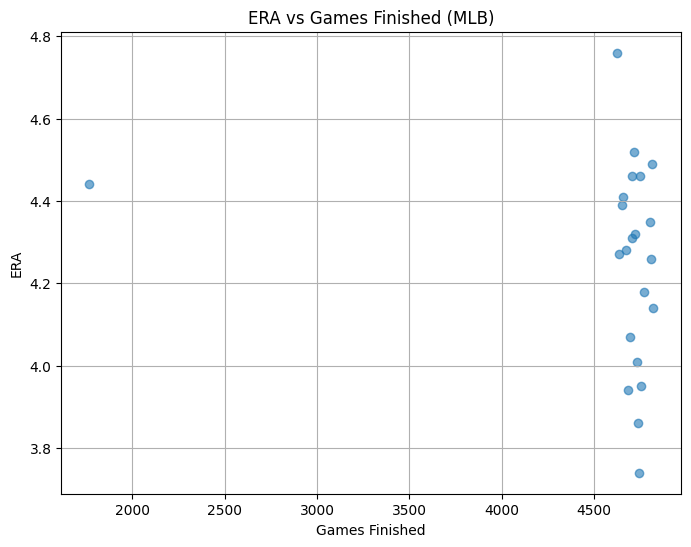

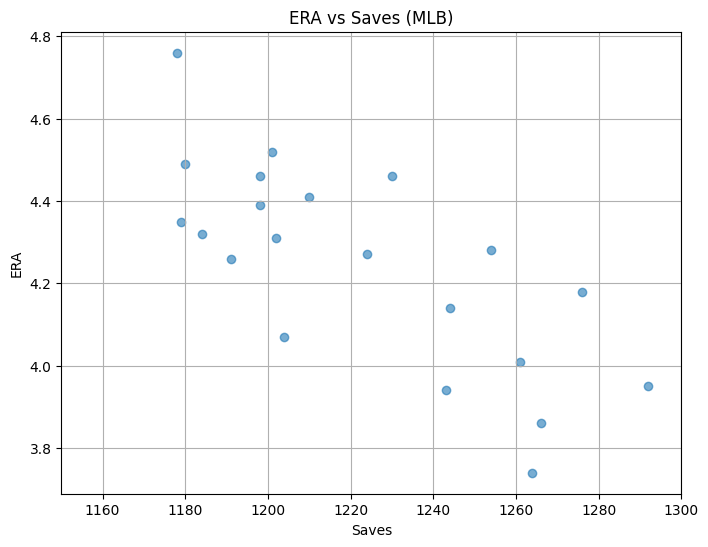

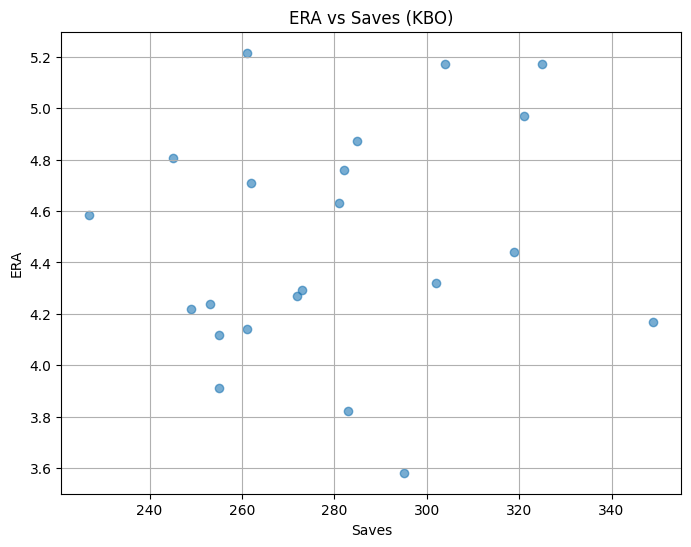

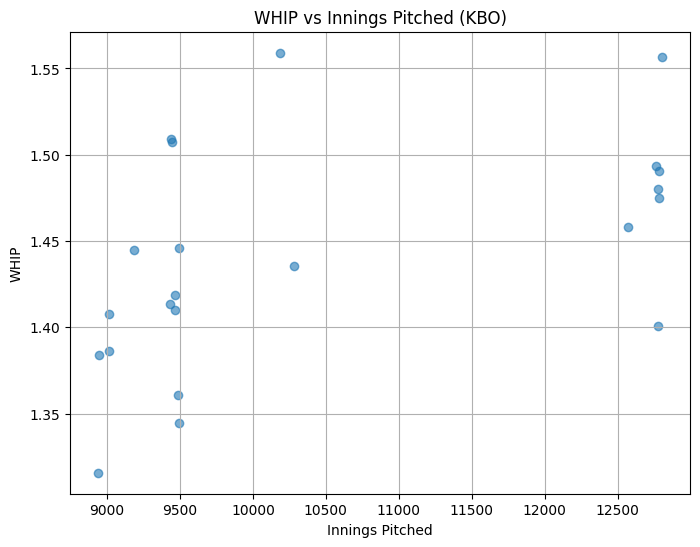

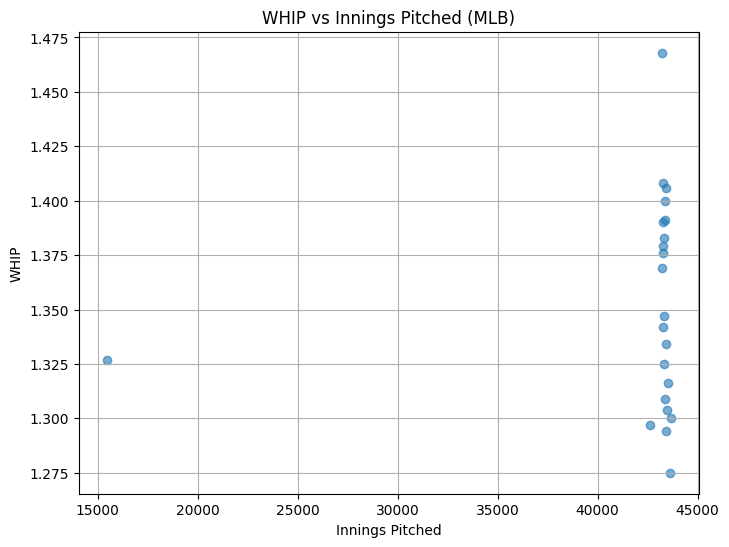

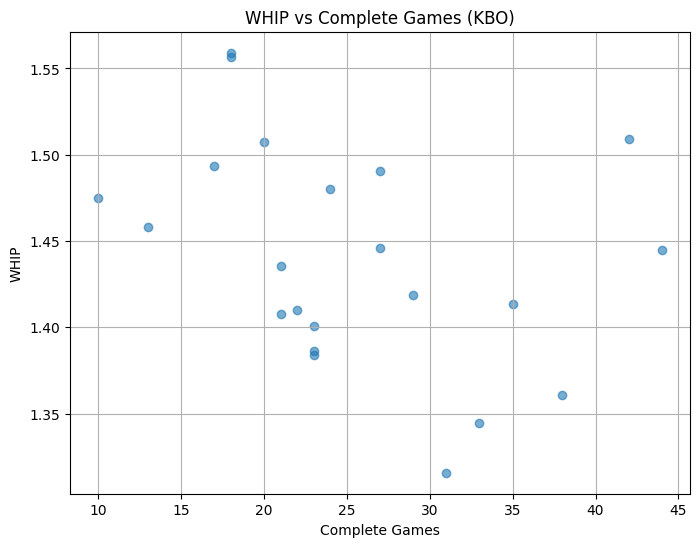

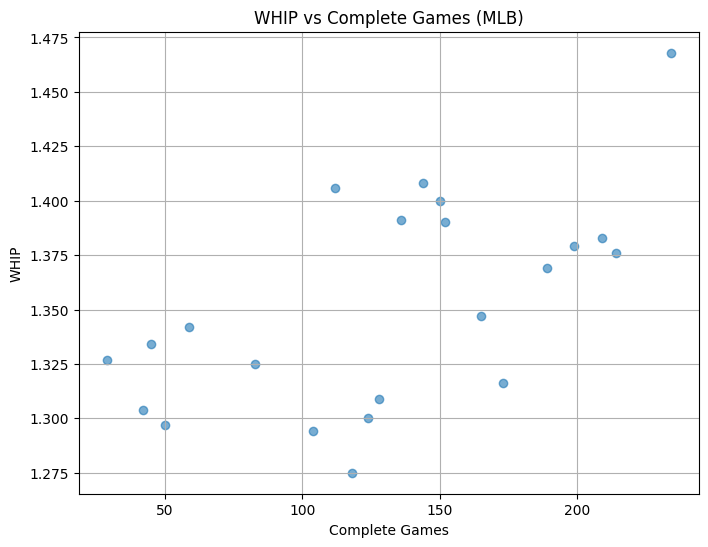

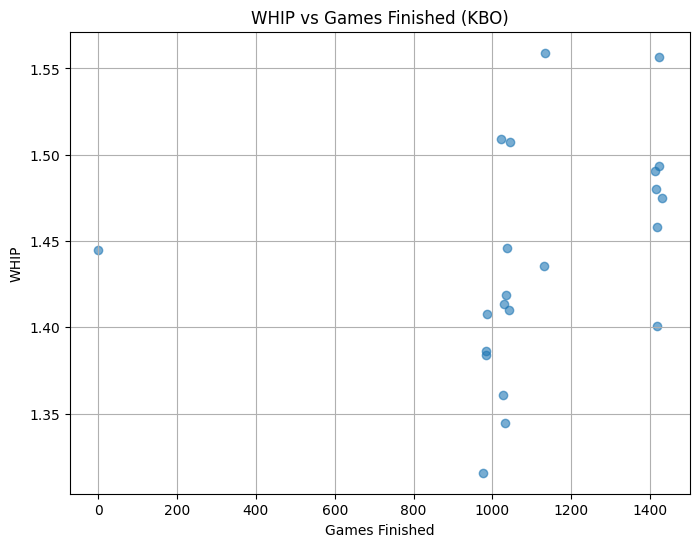

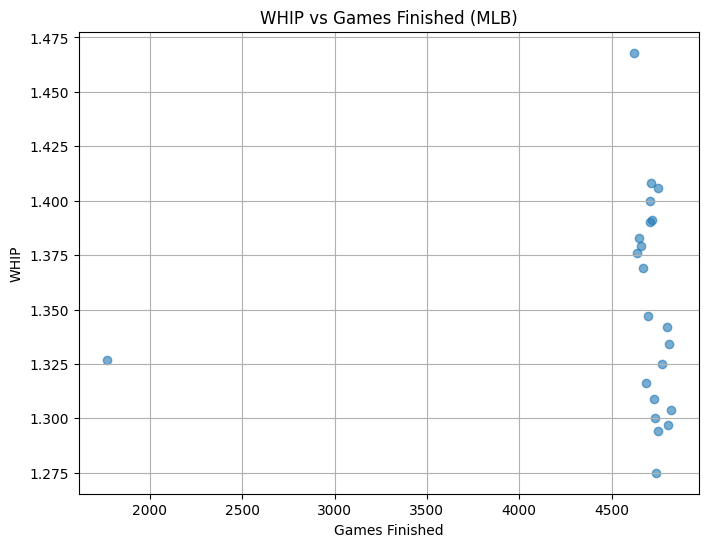

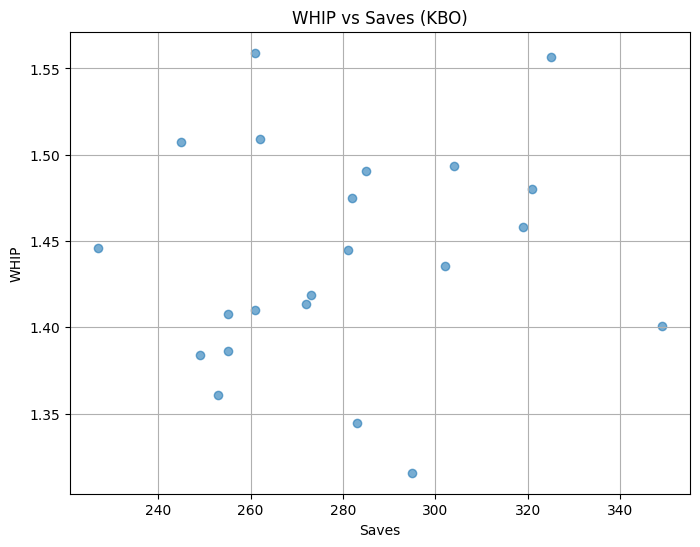

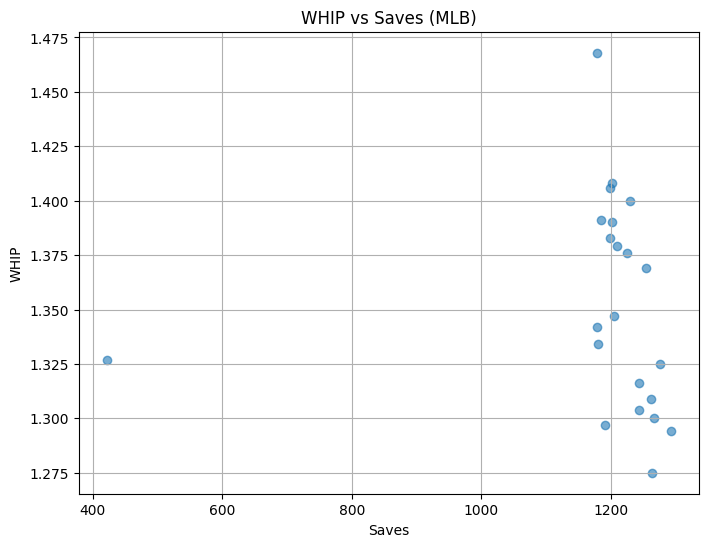

In [27]:
# Define a function to create scatter plots for workload metrics against ERA or WHIP
def plot_scatter_workload(x, y, xlabel, ylabel, league):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.6)
    plt.title(f'{ylabel} vs {xlabel} ({league})')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Plot Workload Metrics vs ERA
plot_scatter_workload(kbodata['innings_pitched'], kbodata['ERA'], 'Innings Pitched', 'ERA', 'KBO')
plot_scatter_workload(mlbdata['innings_pitched'], mlbdata['ERA'], 'Innings Pitched', 'ERA', 'MLB')

plot_scatter_workload(kbodata['complete_game'], kbodata['ERA'], 'Complete Games', 'ERA', 'KBO')
plot_scatter_workload(mlbdata['complete_game'], mlbdata['ERA'], 'Complete Games', 'ERA', 'MLB')

plot_scatter_workload(kbodata['games_finished'], kbodata['ERA'], 'Games Finished', 'ERA', 'KBO')
plot_scatter_workload(mlbdata['games_finished'], mlbdata['ERA'], 'Games Finished', 'ERA', 'MLB')

# Plot the specific graph "ERA vs Saves (MLB)" with the x-axis limit set from 1150 to 1300
plt.figure(figsize=(8, 6))
plt.scatter(mlbdata['saves'], mlbdata['ERA'], alpha=0.6)
plt.title('ERA vs Saves (MLB)')
plt.xlabel('Saves')
plt.ylabel('ERA')
plt.xlim(1150, 1300)  # Set x-axis limits for the specific graph
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(kbodata['saves'], kbodata['ERA'], alpha=0.6)
plt.title('ERA vs Saves (KBO)')
plt.xlabel('Saves')
plt.ylabel('ERA')
plt.grid(True)
plt.show()

# Plot Workload Metrics vs WHIP
plot_scatter_workload(kbodata['innings_pitched'], kbodata['WHIP'], 'Innings Pitched', 'WHIP', 'KBO')
plot_scatter_workload(mlbdata['innings_pitched'], mlbdata['WHIP'], 'Innings Pitched', 'WHIP', 'MLB')

plot_scatter_workload(kbodata['complete_game'], kbodata['WHIP'], 'Complete Games', 'WHIP', 'KBO')
plot_scatter_workload(mlbdata['complete_game'], mlbdata['WHIP'], 'Complete Games', 'WHIP', 'MLB')

plot_scatter_workload(kbodata['games_finished'], kbodata['WHIP'], 'Games Finished', 'WHIP', 'KBO')
plot_scatter_workload(mlbdata['games_finished'], mlbdata['WHIP'], 'Games Finished', 'WHIP', 'MLB')

plot_scatter_workload(kbodata['saves'], kbodata['WHIP'], 'Saves', 'WHIP', 'KBO')
plot_scatter_workload(mlbdata['saves'], mlbdata['WHIP'], 'Saves', 'WHIP', 'MLB')

In [16]:
# Compare the correlation results to determine the impact of workload management on performance
def compare_workload_impact(kbo_corr, mlb_corr, metric):
    if abs(kbo_corr) > abs(mlb_corr):
        print(f"{metric} has a stronger impact on performance in KBO than in MLB.")
    else:
        print(f"{metric} has a stronger impact on performance in MLB than in KBO.")

# Compare correlations
compare_workload_impact(kbo_corr_innings_era, mlb_corr_innings_era, "Innings Pitched and ERA")
compare_workload_impact(kbo_corr_innings_whip, mlb_corr_innings_whip, "Innings Pitched and WHIP")
compare_workload_impact(kbo_corr_complete_era, mlb_corr_complete_era, "Complete Games and ERA")
compare_workload_impact(kbo_corr_complete_whip, mlb_corr_complete_whip, "Complete Games and WHIP")
compare_workload_impact(kbo_corr_finished_era, mlb_corr_finished_era, "Games Finished and ERA")
compare_workload_impact(kbo_corr_finished_whip, mlb_corr_finished_whip, "Games Finished and WHIP")
compare_workload_impact(kbo_corr_saves_era, mlb_corr_saves_era, "Saves and ERA")
compare_workload_impact(kbo_corr_saves_whip, mlb_corr_saves_whip, "Saves and WHIP")

Innings Pitched and ERA has a stronger impact on performance in KBO than in MLB.
Innings Pitched and WHIP has a stronger impact on performance in KBO than in MLB.
Complete Games and ERA has a stronger impact on performance in KBO than in MLB.
Complete Games and WHIP has a stronger impact on performance in MLB than in KBO.
Games Finished and ERA has a stronger impact on performance in KBO than in MLB.
Games Finished and WHIP has a stronger impact on performance in KBO than in MLB.
Saves and ERA has a stronger impact on performance in MLB than in KBO.
Saves and WHIP has a stronger impact on performance in KBO than in MLB.


In [17]:
# Calculate correlation between special situations and performance metrics for both leagues
kbo_corr_wildpitches_era = kbodata['wild_pitches'].corr(kbodata['ERA'])
kbo_corr_wildpitches_whip = kbodata['wild_pitches'].corr(kbodata['WHIP'])
kbo_corr_balks_era = kbodata['balks'].corr(kbodata['ERA'])
kbo_corr_balks_whip = kbodata['balks'].corr(kbodata['WHIP'])
kbo_corr_hitbatter_era = kbodata['hit_batter'].corr(kbodata['ERA'])
kbo_corr_hitbatter_whip = kbodata['hit_batter'].corr(kbodata['WHIP'])

mlb_corr_wildpitches_era = mlbdata['wild_pitches'].corr(mlbdata['ERA'])
mlb_corr_wildpitches_whip = mlbdata['wild_pitches'].corr(mlbdata['WHIP'])
mlb_corr_balks_era = mlbdata['balks'].corr(mlbdata['ERA'])
mlb_corr_balks_whip = mlbdata['balks'].corr(mlbdata['WHIP'])
mlb_corr_hitbatter_era = mlbdata['hit_batter'].corr(mlbdata['ERA'])
mlb_corr_hitbatter_whip = mlbdata['hit_batter'].corr(mlbdata['WHIP'])

# Display the correlation results
print("Correlation between Wild Pitches and ERA (KBO):", kbo_corr_wildpitches_era)
print("Correlation between Wild Pitches and WHIP (KBO):", kbo_corr_wildpitches_whip)
print("Correlation between Balks and ERA (KBO):", kbo_corr_balks_era)
print("Correlation between Balks and WHIP (KBO):", kbo_corr_balks_whip)
print("Correlation between Hit Batters and ERA (KBO):", kbo_corr_hitbatter_era)
print("Correlation between Hit Batters and WHIP (KBO):", kbo_corr_hitbatter_whip)

print("\nCorrelation between Wild Pitches and ERA (MLB):", mlb_corr_wildpitches_era)
print("Correlation between Wild Pitches and WHIP (MLB):", mlb_corr_wildpitches_whip)
print("Correlation between Balks and ERA (MLB):", mlb_corr_balks_era)
print("Correlation between Balks and WHIP (MLB):", mlb_corr_balks_whip)
print("Correlation between Hit Batters and ERA (MLB):", mlb_corr_hitbatter_era)
print("Correlation between Hit Batters and WHIP (MLB):", mlb_corr_hitbatter_whip)

Correlation between Wild Pitches and ERA (KBO): 0.5156082533331436
Correlation between Wild Pitches and WHIP (KBO): 0.4974055424781592
Correlation between Balks and ERA (KBO): 0.30640147546481233
Correlation between Balks and WHIP (KBO): 0.34605460779094827
Correlation between Hit Batters and ERA (KBO): 0.5701955834630943
Correlation between Hit Batters and WHIP (KBO): 0.41470523604889575

Correlation between Wild Pitches and ERA (MLB): -0.3362374394532254
Correlation between Wild Pitches and WHIP (MLB): -0.28224847183648877
Correlation between Balks and ERA (MLB): -0.025808469446490415
Correlation between Balks and WHIP (MLB): 0.20427444201518488
Correlation between Hit Batters and ERA (MLB): 0.1431410115742724
Correlation between Hit Batters and WHIP (MLB): 0.10161337347550121


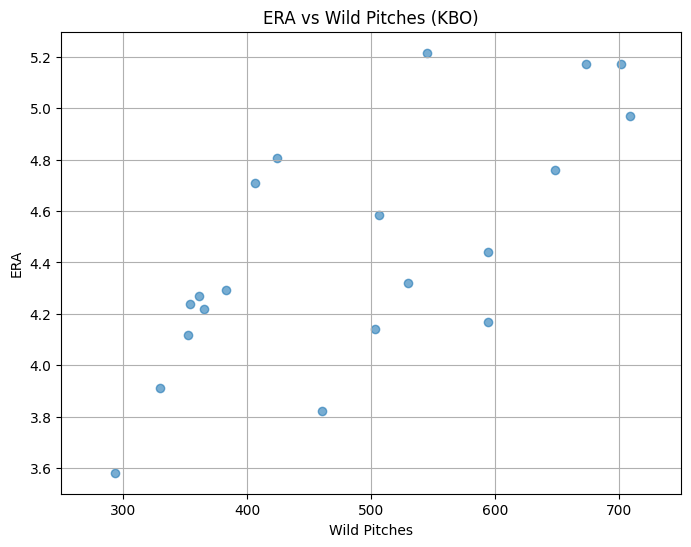

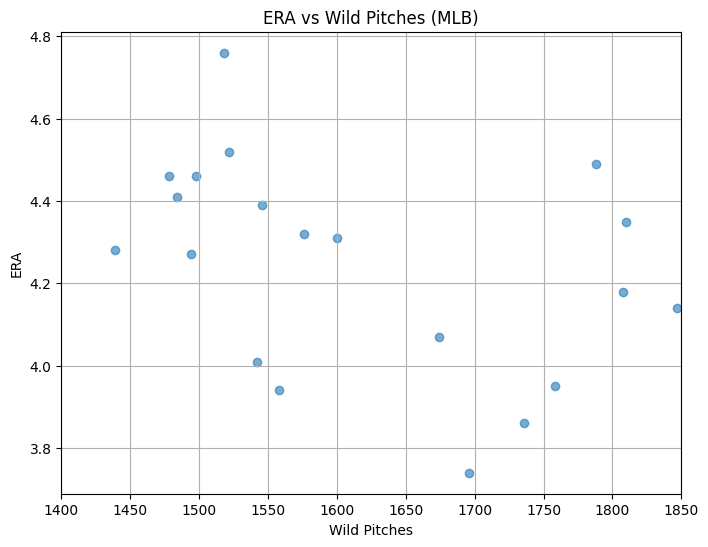

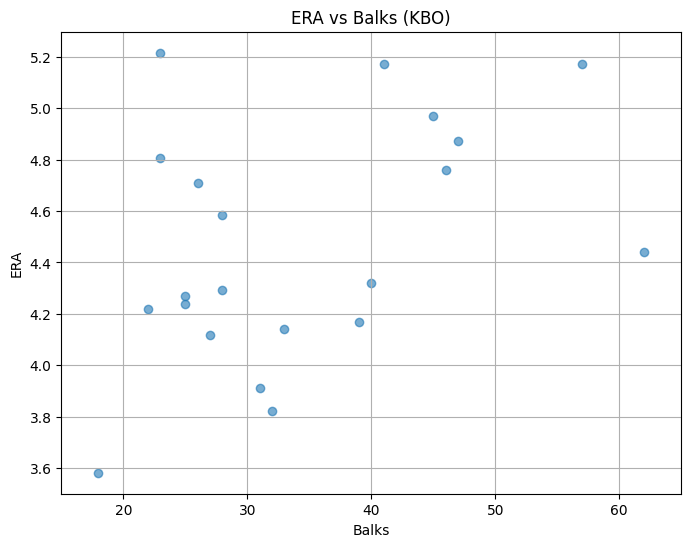

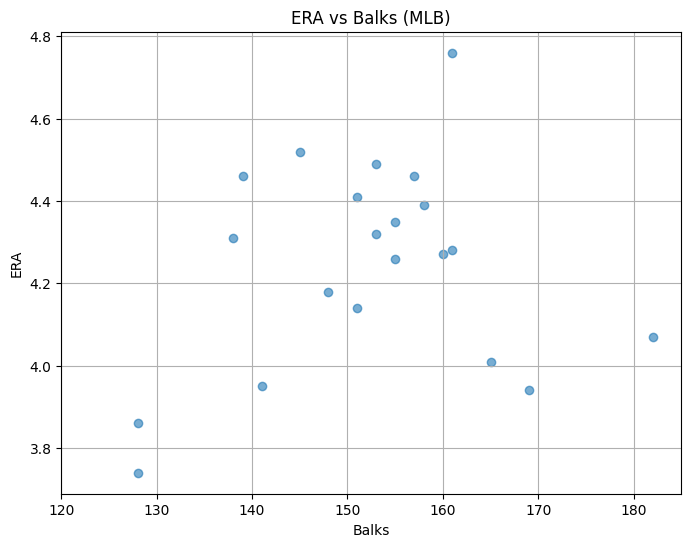

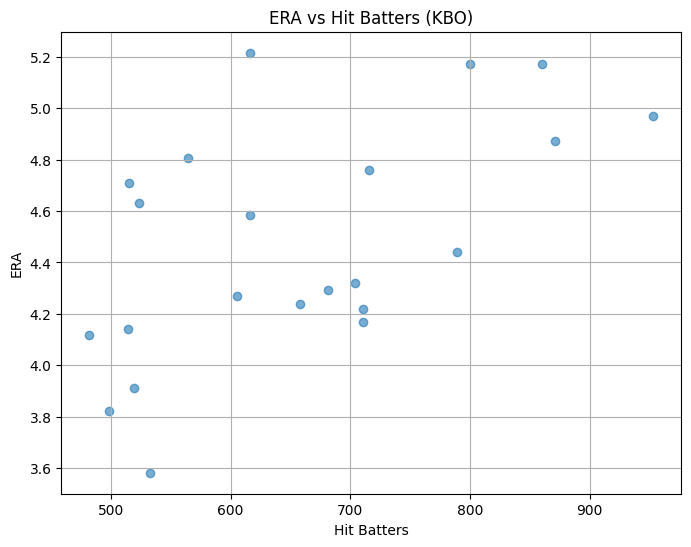

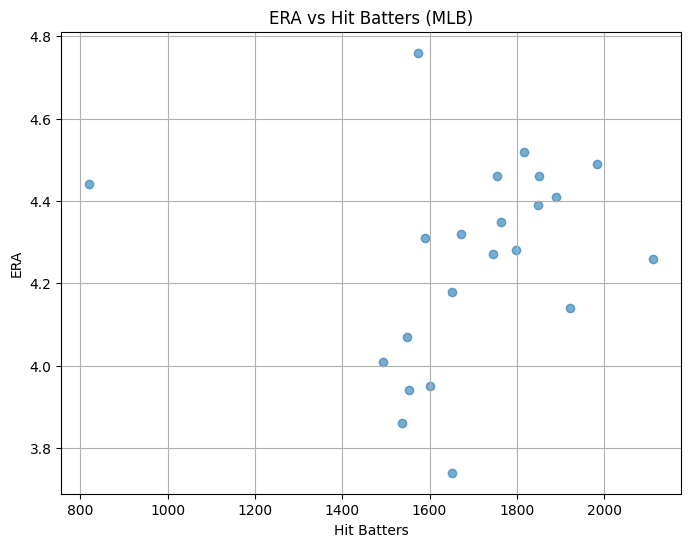

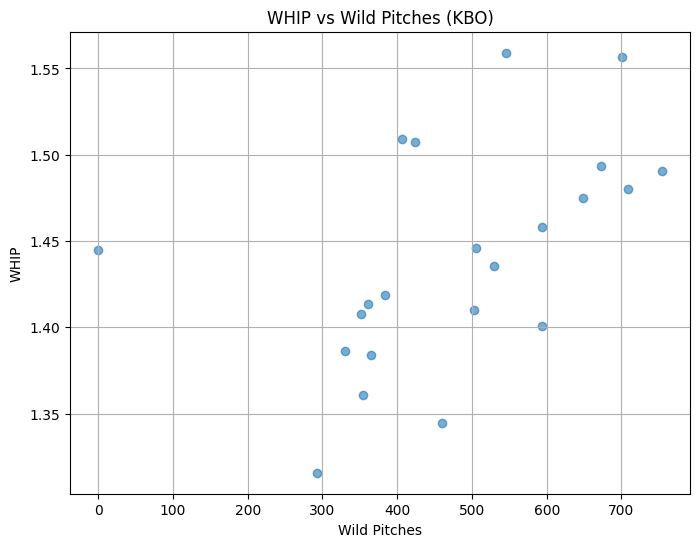

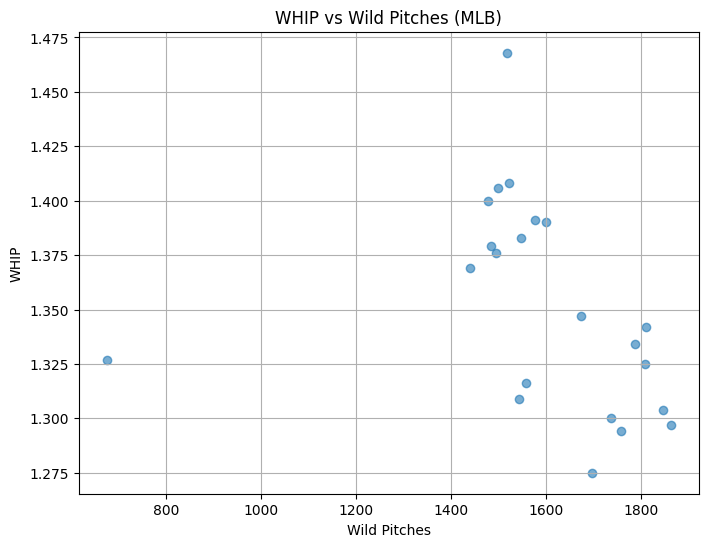

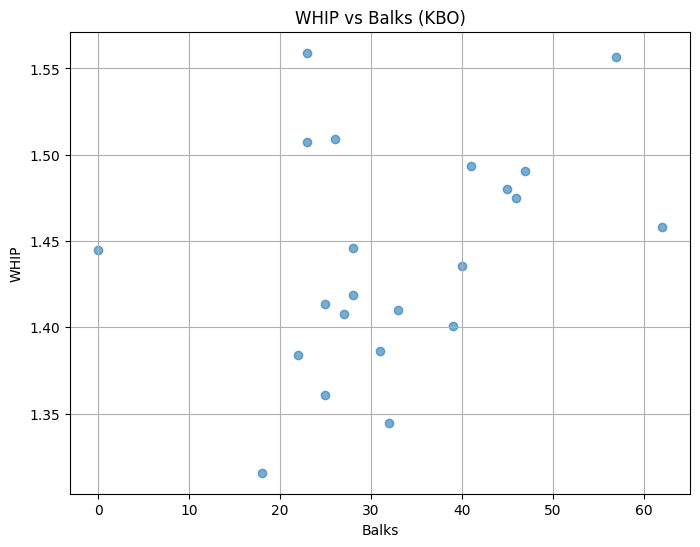

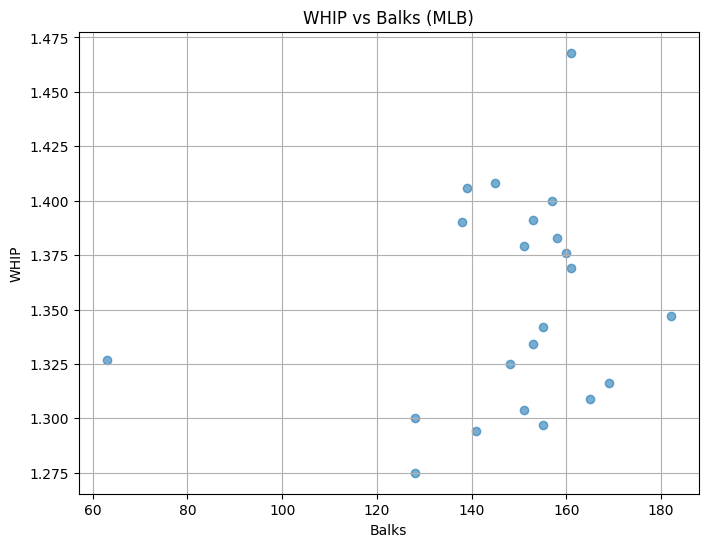

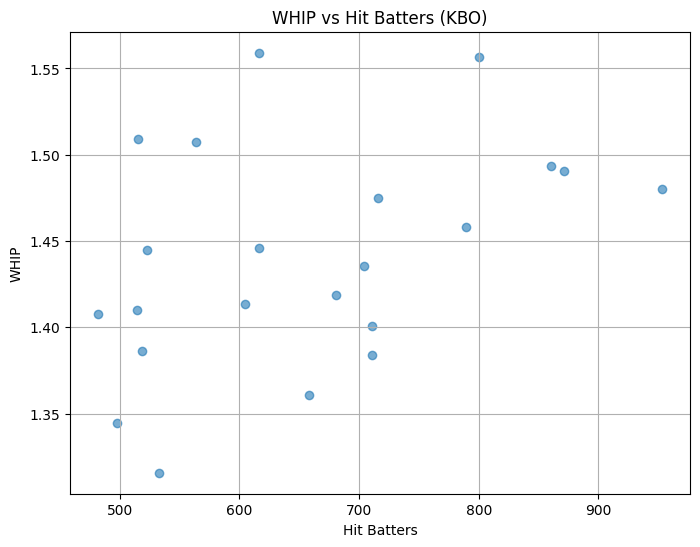

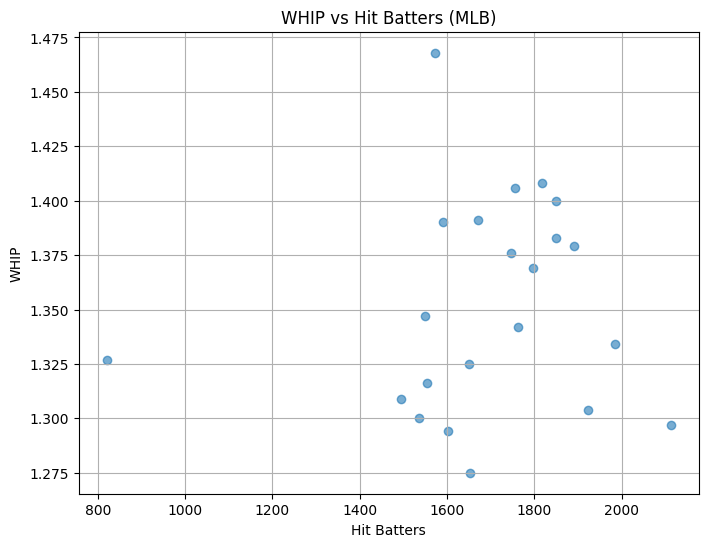

In [32]:
# Define a function to create scatter plots for special situations against performance metrics
def plot_scatter_special_situations(x, y, xlabel, ylabel, league, x_start=None, x_end=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.6)
    plt.title(f'{ylabel} vs {xlabel} ({league})')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Set x-axis limits if provided
    if x_start is not None and x_end is not None:
        plt.xlim(x_start, x_end)
    
    plt.grid(True)
    plt.show()

# Plot Special Situations vs ERA
plot_scatter_special_situations(kbodata['wild_pitches'], kbodata['ERA'], 'Wild Pitches', 'ERA', 'KBO', x_start=250, x_end=750)
plot_scatter_special_situations(mlbdata['wild_pitches'], mlbdata['ERA'], 'Wild Pitches', 'ERA', 'MLB', x_start=1400, x_end=1850)

plot_scatter_special_situations(kbodata['balks'], kbodata['ERA'], 'Balks', 'ERA', 'KBO', x_start=15, x_end=65)
plot_scatter_special_situations(mlbdata['balks'], mlbdata['ERA'], 'Balks', 'ERA', 'MLB', x_start=120, x_end=185)

plot_scatter_special_situations(kbodata['hit_batter'], kbodata['ERA'], 'Hit Batters', 'ERA', 'KBO')
plot_scatter_special_situations(mlbdata['hit_batter'], mlbdata['ERA'], 'Hit Batters', 'ERA', 'MLB')

# Plot Special Situations vs WHIP
plot_scatter_special_situations(kbodata['wild_pitches'], kbodata['WHIP'], 'Wild Pitches', 'WHIP', 'KBO')
plot_scatter_special_situations(mlbdata['wild_pitches'], mlbdata['WHIP'], 'Wild Pitches', 'WHIP', 'MLB')

plot_scatter_special_situations(kbodata['balks'], kbodata['WHIP'], 'Balks', 'WHIP', 'KBO')
plot_scatter_special_situations(mlbdata['balks'], mlbdata['WHIP'], 'Balks', 'WHIP', 'MLB')

plot_scatter_special_situations(kbodata['hit_batter'], kbodata['WHIP'], 'Hit Batters', 'WHIP', 'KBO')
plot_scatter_special_situations(mlbdata['hit_batter'], mlbdata['WHIP'], 'Hit Batters', 'WHIP', 'MLB')


In [19]:
# Compare the correlation results to determine the impact of special situations on performance
def compare_special_situations_impact(kbo_corr, mlb_corr, metric):
    if abs(kbo_corr) > abs(mlb_corr):
        print(f"{metric} has a stronger impact on performance in KBO than in MLB.")
    else:
        print(f"{metric} has a stronger impact on performance in MLB than in KBO.")

# Compare correlations
compare_special_situations_impact(kbo_corr_wildpitches_era, mlb_corr_wildpitches_era, "Wild Pitches and ERA")
compare_special_situations_impact(kbo_corr_wildpitches_whip, mlb_corr_wildpitches_whip, "Wild Pitches and WHIP")
compare_special_situations_impact(kbo_corr_balks_era, mlb_corr_balks_era, "Balks and ERA")
compare_special_situations_impact(kbo_corr_balks_whip, mlb_corr_balks_whip, "Balks and WHIP")
compare_special_situations_impact(kbo_corr_hitbatter_era, mlb_corr_hitbatter_era, "Hit Batters and ERA")
compare_special_situations_impact(kbo_corr_hitbatter_whip, mlb_corr_hitbatter_whip, "Hit Batters and WHIP")

Wild Pitches and ERA has a stronger impact on performance in KBO than in MLB.
Wild Pitches and WHIP has a stronger impact on performance in KBO than in MLB.
Balks and ERA has a stronger impact on performance in KBO than in MLB.
Balks and WHIP has a stronger impact on performance in KBO than in MLB.
Hit Batters and ERA has a stronger impact on performance in KBO than in MLB.
Hit Batters and WHIP has a stronger impact on performance in KBO than in MLB.
